# 3.4 Regression Analysis: Median Income vs. Adult Diabetes

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6\Food Environment Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_imputed.csv'))

### 2. Data cleaning

In [5]:
df.head()

,FIPS,State,County,laccess,pct_laccess,lowinc_laccess,pct_lowinc_laccess,snap_laccess,pct_snap_laccess,child_laccess,...,pct_pacific_laccess,multi_laccess,pct_multi_laccess,pct_snap,pct_snap_participation,pct_adult_diabetes,pct_adult_obese,pct_food_insec,pct_vlow_foodsecure,med_income
0,1001,AL,Autauga,17496.693040,32.062255,6543.676824,11.991125,931.935186,4.608749,4616.971480,...,0.016159,482.848633,0.884808,16.500056,86.898,13.0,36.3,16.3,7.1,56580.0
1,1003,AL,Baldwin,30561.264430,16.767489,9886.831137,5.424427,950.535290,1.298900,7007.972675,...,0.008131,1127.696098,0.618712,16.500056,86.898,10.4,36.3,16.3,7.1,52387.0
2,1005,AL,Barbour,6069.523628,22.105560,2948.790251,10.739667,422.569040,4.303147,1031.927776,...,0.029436,462.382655,1.684025,16.500056,86.898,18.4,36.3,16.3,7.1,31433.0
3,1007,AL,Bibb,969.378841,4.230324,596.162829,2.601627,53.818772,0.676710,232.642670,...,0.000000,5.259244,0.022951,16.500056,86.898,14.8,36.3,16.3,7.1,40767.0
4,1009,AL,Blount,3724.428242,6.497380,1650.959482,2.880150,175.370338,0.812727,910.686113,...,0.001854,202.914186,0.353990,16.500056,86.898,14.1,36.3,16.3,7.1,50487.0


In [6]:
df.shape

(3143, 34)

####  Data was cleaned and integrity checks run previously. I will examine the data used in exploring the relationship between rates of diabetes and median income for extreme values.

C:\Users\dsadl\AppData\Local\Temp\ipykernel_29296\2388792376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pct_adult_diabetes'], bins=25)


<Axes: xlabel='pct_adult_diabetes', ylabel='Density'>

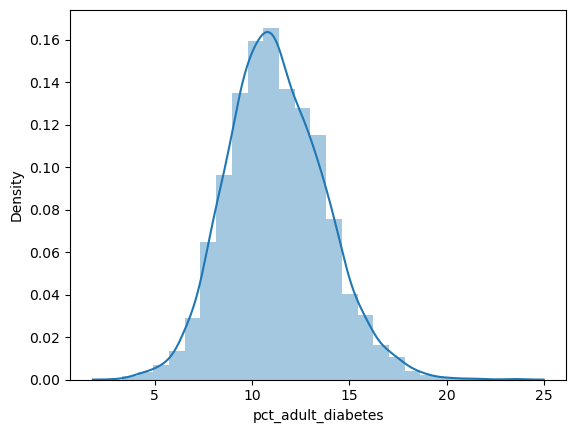

In [8]:
# Extreme values check on rates of adult diabetes

sns.distplot(df['pct_adult_diabetes'], bins=25) # no extreme values

C:\Users\dsadl\AppData\Local\Temp\ipykernel_29296\1797157022.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['med_income'], bins=25)


<Axes: xlabel='med_income', ylabel='Density'>

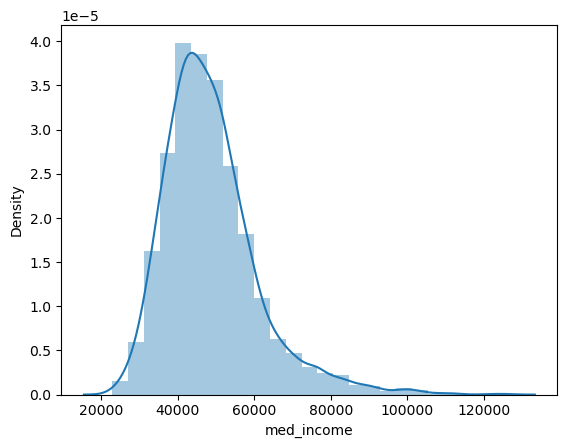

In [9]:
# Extreme values check on median income

sns.distplot(df['med_income'], bins=25) # no extreme values

### 3. Data prep for regression analysis

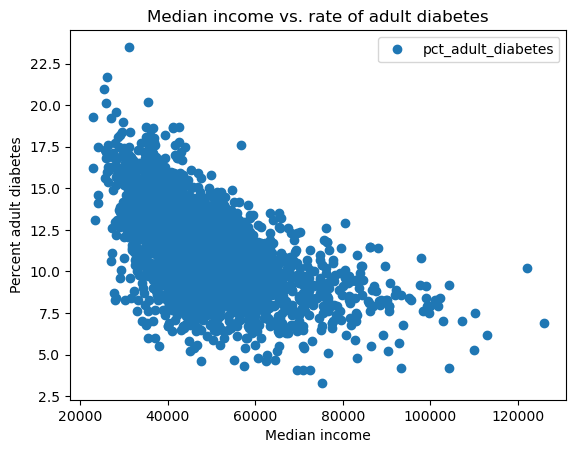

In [28]:
df.plot(x = 'med_income', y='pct_adult_diabetes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median income vs. rate of adult diabetes')  
plt.xlabel('Median income')  
plt.ylabel('Percent adult diabetes')  
plt.show()

#### Hypothesis to test: As incomes decrease, rates of adult diabetes increase.

In [14]:
# Reshape the variables into arrays and put them into separate objects

X = df['med_income'].values.reshape(-1,1)
y = df['pct_adult_diabetes'].values.reshape(-1,1)

In [15]:
X

array([[56580.],
       [52387.],
       [31433.],
       ...,
       [62968.],
       [56088.],
       [60986.]])

In [16]:
y

array([[13. ],
       [10.4],
       [18.4],
       ...,
       [ 9. ],
       [12. ],
       [10. ]])

In [17]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [19]:
# Create a regression object

regression = LinearRegression()

In [20]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values for y on the test set

y_predicted = regression.predict(X_test)

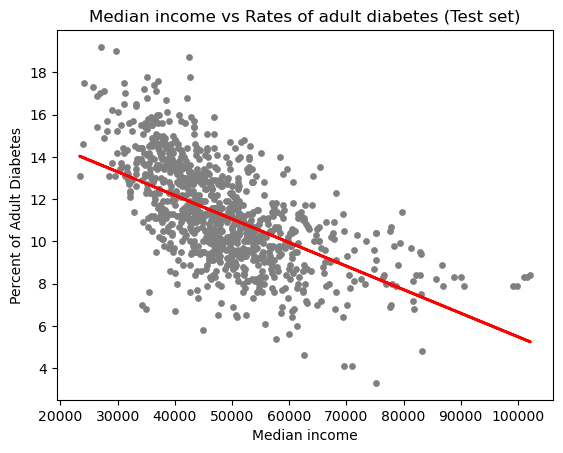

In [29]:
# Create a plot with the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 2)
plot_test.title('Median income vs Rates of adult diabetes (Test set)')
plot_test.xlabel('Median income')
plot_test.ylabel('Percent of Adult Diabetes')
plot_test.show()

### There is considerable variation in the data so the line depicting the model doesn't appear to fit very well.

In [30]:
# Run the model performance statistics for the test set

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00011152]]
Mean squared error:  3.674833739968908
R2 score:  0.37270451346465283


In [32]:
y_predicted

array([[12.63346394],
       [ 8.24628812],
       [ 7.47368126],
       [10.74934255],
       [12.42771052],
       [12.20456007],
       [11.84981665],
       [11.39649002],
       [ 8.62244328],
       [11.07810194],
       [ 9.41222415],
       [ 8.67942973],
       [11.15850748],
       [10.72904601],
       [ 9.89878358],
       [12.84100167],
       [12.08969502],
       [12.22429902],
       [10.79160843],
       [10.79127387],
       [10.15750874],
       [12.26801465],
       [11.04676497],
       [12.48536609],
       [11.86676761],
       [10.94717809],
       [12.04631395],
       [11.95241456],
       [ 8.25398297],
       [10.47533922],
       [11.67908035],
       [12.4659617 ],
       [11.58495792],
       [11.12170605],
       [10.46909413],
       [11.24649633],
       [12.29433324],
       [12.35243488],
       [10.50857202],
       [11.7435386 ],
       [12.21872304],
       [12.39559292],
       [11.6461821 ],
       [10.85305566],
       [12.44120438],
       [ 7

In [33]:
# Compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,15.9,12.633464
1,10.4,8.246288
2,8.4,7.473681
3,13.3,10.749343
4,14.2,12.427711
5,9.5,12.204560
6,9.5,11.849817
7,11.2,11.396490
8,10.3,8.622443
9,9.3,11.078102


### Discussion: How the model performed on the test set

The value of the slope is -0.0001, indicating a negative relationship, which was what I hypothesized. The root mean squared error (MSE) is 3.67, which is a relatively small value, indicating that the model is a good fit to the data. But the values for rates of diabetes range from 0 to 20, so they are relatively small as well. The r-squared value was 0.3727, indicating that the model is a poor fit to the data.

Looking at the Actual and Predicted values as well as the performance statistics, my conclusion is that the model isn't performing very well. This regression analysis provides more evidence that the relationships about which I've created hypotheses in my exploratory analysis are multifactorial rather than single variable correlations.

A source of possible bias in the data that I identified is the potential for inaccuracy in data for household incomes in the estimating process used by the  U.S. Census Bureau. Incomes that changed after the 2010 Census would be inaccurately estimated for the 2015 data used here, and predictions based on those estimated incomes would also be inaccurate.